In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, precision_recall_curve, roc_curve)

# ___Precision-Recall and ROC Curves___
----------------

## ___Precision-Recall Curves___
----------

In [4]:
# Precision-Recall curves are very widely used to evaluate performance in ML.
# An ideal classifier may be able to provide a precision = 1 and recall = 1
# Typically x axes -> precision and y axes -> recall
# The closer the curve is to the top right corner (x = 1, y = 1) (max precision, max recall), the better the performance is.
# In real-world applications the tradeoff between precision and recall will be obvious.
# Steepness of Precision-Recall curves indicates increase in Precision and Recall.

## ___Receiver Operating characteristic (ROC) Curves___
-------------

In [5]:
# ROC curves -> Receiver Operating characteristic curves
# ROC curves are very widely used in visualizations methods that illustrate the performance of binary classifiers.

# typicall x axis -> FPR
# y axis -> TPR

# y axis of the ROC curve is just the recall metric.
# Steepness of ROC curve indicates maximized TPR and minimized FPR.

# An arbitraty random classifier will have a (0, 0), (1, 1) straight line for the curve.
# A reasonably good classifier will give a curve that is consistently better than the random classifier.

## ___AUC Scores___
---------------

In [2]:
# Advantages of AUC over ROC or Precision-Recall curves =>
# 1) Gives a single float, easy for comparison
# 2) No need to specify a decision threshold.

# Shortcomings =>
# 1) As with other single number metrics, AOC loses information.
# 2) Becomes problemetic when performances of 2 ML models give overlapping ROC curves.

In [10]:
digits = load_digits()

# Skewing the class distribution.
targets = np.array(list(map(lambda x: 0 if x == 0 else 1, digits.target)))

In [3]:
train_x, test_x, train_y, test_y = train_test_split(digits.data, targets, train_size = 0.6)
svc = SVC(C = 0.001, kernel = "rbf", probability = True).fit(train_x, train_y)

In [4]:
# 1 is the label with highest frequency.
ascores = []

for prob in np.arange(0.01, 1, step = 0.01):
    preds = np.array(list(map(lambda lst: 1 if (lst[1] > prob) else 0, svc.predict_proba(test_x))))
    labels, counts = np.unique(preds, return_counts = True)
    ascore = accuracy_score(test_y, preds)
    ascores.append((prob, ascore))

In [5]:
ascores = np.array(ascores)
ascores[:10]

array([[0.01      , 0.9930459 ],
       [0.02      , 0.99582754],
       [0.03      , 0.99582754],
       [0.04      , 0.99582754],
       [0.05      , 0.99582754],
       [0.06      , 0.99721836],
       [0.07      , 0.99860918],
       [0.08      , 0.99860918],
       [0.09      , 0.99860918],
       [0.1       , 0.99860918]])

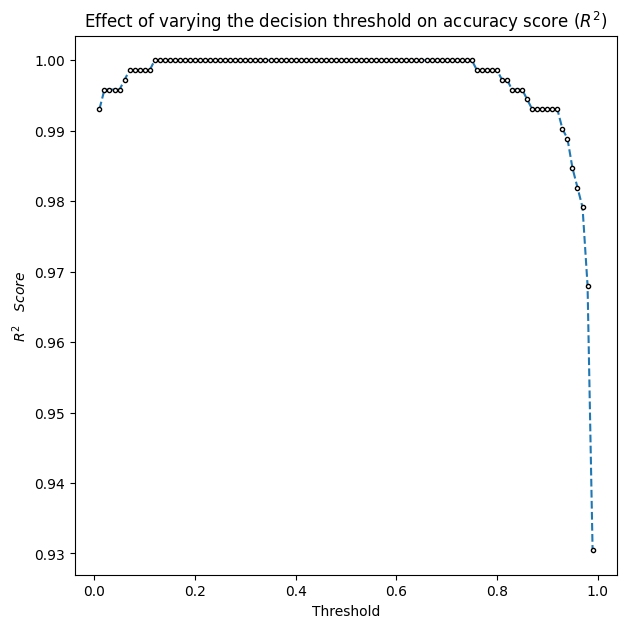

In [6]:
fig, axes = plt.subplots()
fig.set_size_inches(7, 7)
axes.plot(ascores[:, 0], ascores[:, 1], mfc = "white", mec = "black", linestyle = "--", marker = "o", ms = 3)
axes.set_xlabel("Threshold")
axes.set_ylabel("$R^{2}\hspace{1}Score$")
axes.set_title("Effect of varying the decision threshold on accuracy score ($R^{2}$)")
plt.show()

In [7]:
# Precision-Recall curve
precisions = []
recalls = []

for prob in np.arange(0.01, 1, step = 0.001):
    preds = np.array(list(map(lambda lst: 1 if (lst[1] > prob) else 0, svc.predict_proba(test_x))))
    labels, counts = np.unique(preds, return_counts = True)
    precisions.append(precision_score(test_y, preds))
    recalls.append(recall_score(test_y, preds))

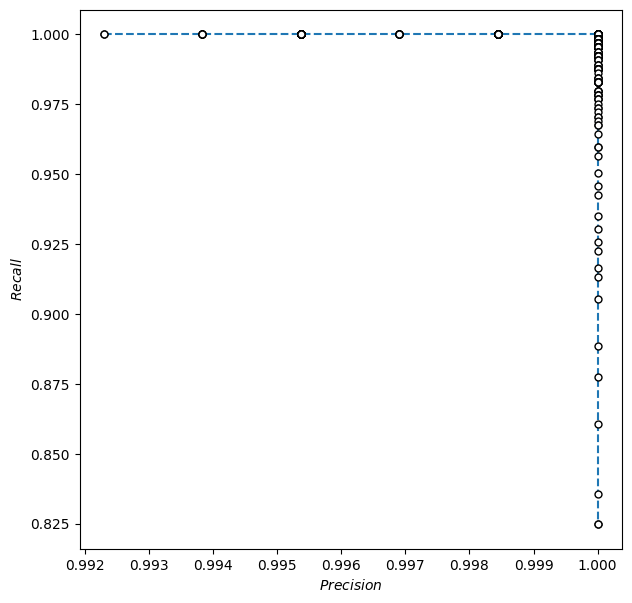

In [8]:
fig, axes = plt.subplots()
fig.set_size_inches(7, 7)
axes.plot(precisions, recalls, mfc = "white", mec = "black", linestyle = "--", marker = "o", ms = 5)
axes.set_xlabel("$Precision$")
axes.set_ylabel("$Recall$")
plt.show()

In [33]:
# Since the feature is imbalanced, with high frequencies of 1;

svc = SVC(C = 0.001, kernel = "rbf", probability = True, class_weight = {0: 1, 1: 0.65}).fit(train_x, train_y)

precisions = []
recalls = []

for prob in np.arange(0.01, 1, step = 0.001):
    preds = np.array(list(map(lambda lst: 1 if (lst[1] > prob) else 0, svc.predict_proba(test_x))))
    labels, counts = np.unique(preds, return_counts = True)
    precisions.append(precision_score(test_y, preds))
    recalls.append(recall_score(test_y, preds))

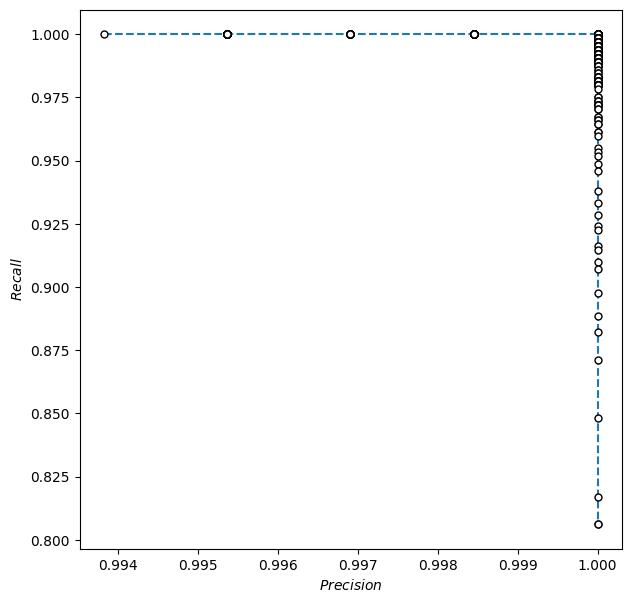

In [34]:
fig, axes = plt.subplots()
fig.set_size_inches(7, 7)
axes.plot(precisions, recalls, mfc = "white", mec = "black", linestyle = "--", marker = "o", ms = 5)
axes.set_xlabel("$Precision$")
axes.set_ylabel("$Recall$")
plt.show()

In [13]:
train_x.shape, targets.shape

((1078, 64), (1797,))

In [24]:
logReg = LogisticRegression(max_iter = 10_000, C = 1).fit(train_x, train_y)

In [25]:
logReg.classes_

array([0, 1])

In [26]:
precision = []
recall = []

for prob in np.arange(0.0, 1, step = 0.01):
    pred_probs_label_one = logReg.predict_proba(test_x)[:, 1]
    preds_with_threshold = np.array(list(map(lambda x: 1 if x > prob else 0, pred_probs_label_one)))
    precision.append(precision_score(test_y, preds_with_threshold))
    recall.append(recall_score(test_y, preds_with_threshold))

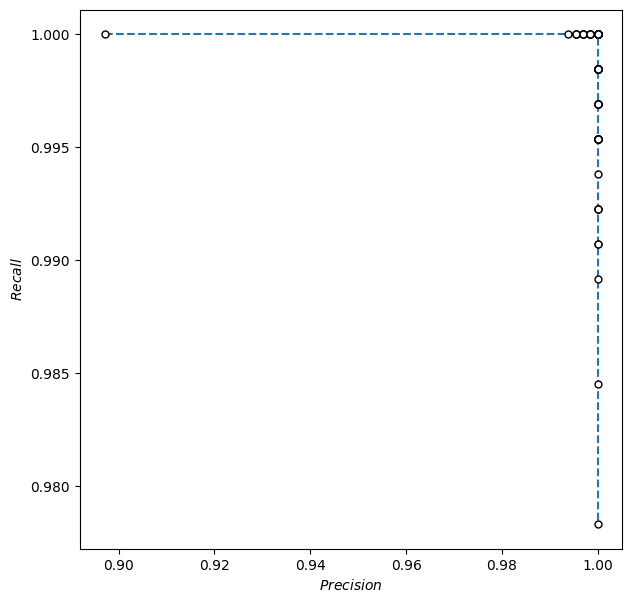

In [32]:
fig, axes = plt.subplots()
fig.set_size_inches(7, 7)
axes.plot(precision, recall, mfc = "white", mec = "black", linestyle = "--", marker = "o", ms = 5)
axes.set_xlabel("$Precision$")
axes.set_ylabel("$Recall$")
plt.show()

array([ 0.24536933,  0.08844622,  0.11329847, -0.27044429,  0.59264603,
       -0.09909924, -0.27697779,  0.11972181,  0.13118782,  0.09510146])

In [87]:
fpr, tpr, _ = roc_curve(test_y, logReg.predict_proba(test_x)[:, 1])
x = np.arange(0, 1.1, step = 0.1)
poor = x + np.array([ 0,  0.08844622,  0.11329847, -0.07044429,  0.19264603,
       -0.09909924, -0.27697779,  0.11972181,  0.13118782,  0.043134, 0])

In [88]:
x.shape, poor.shape

((11,), (11,))

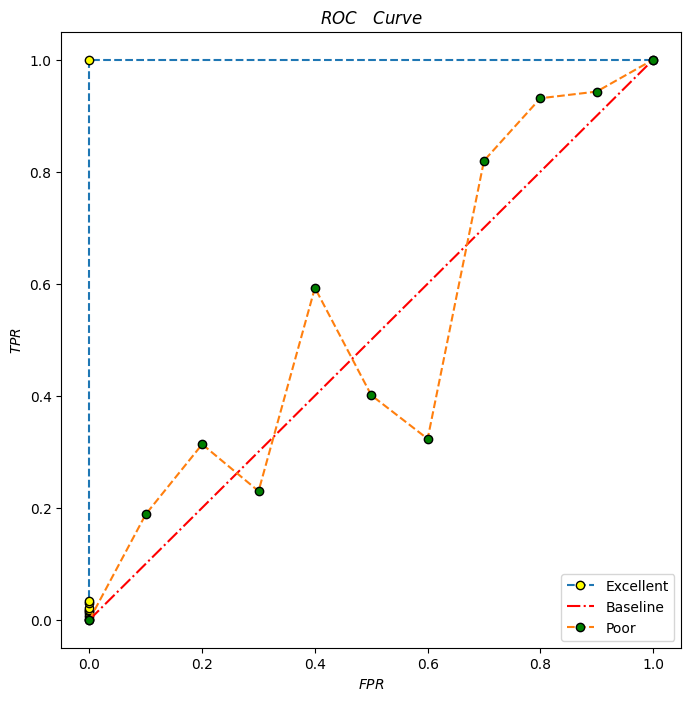

In [89]:
fig, axes = plt.subplots()
fig.set_size_inches(8, 8)
axes.plot(fpr, tpr, marker = "o", mec = "black", mfc = "yellow", linestyle = "--", label = "Excellent")
axes.plot([0, 1], [0, 1], color = "red", linestyle = "-.", marker = "none", label = "Baseline")
axes.plot(x, poor, marker = "o", mec = "black", mfc = "green", linestyle = "--", label = "Poor")
axes.legend()
axes.set_xlabel("$FPR$")
axes.set_ylabel("$TPR$")
axes.set_title("$ROC\hspace{1}Curve$")
plt.show()

In [90]:
# We can evaluate the goodness of a classifier by the area under the ROC curve.
# For the random classifier (baseline), the AUC is 0.5 (50%)
# For the excellent classifier, AUC is almost 1 (100%)

In [91]:
# AUC score is a single float that measures the area under the ROC curve, to summarize a classifier's performance. 

In [ ]:
# Similar or identical AUC scores can be produced ROC curves with varying shapes.